## CAPX

## Task - 1 -> Data Scraping -> Python Reddit API Wrapper i.e PRAW

In [1]:
import praw

In [2]:
## using the credential to login my reddit account.
id_number = 'VzvWxDgIRwgntoOiL-0MAg'  
secret_number = 'GeXZwlOHE6DZNxhEn93z81N8UOsamA'  
username = 'my_reddit_scraper:v1.0 (by /u/Narender_4087)'

In [3]:
reddit = praw.Reddit(client_id=id_number,
                     client_secret=secret_number,
                     user_agent=username)

# Im selecting stock subreddit to scrape data.
subreddit = reddit.subreddit('stocks')  # you can Replace 'stocks' with any subreddit if you want like investing.

In [4]:
# in this we are Scraping the latest 5 posts from the subreddit of stocks
for submission in subreddit.new(limit=5):
    print(f"Title: {submission.title}")
    print(f"Upvotes: {submission.score}")
    print(f"URL: {submission.url}")
    print(f"Created: {submission.created_utc}")
    print(f"Text: {submission.selftext}\n")

Title: Online stock recommadtions premium acct
Upvotes: 0
URL: https://www.reddit.com/r/stocks/comments/1h697ep/online_stock_recommadtions_premium_acct/
Created: 1733291661.0
Text: Hi guys, iam planning to purchase premium acct to. Get stocl recommadtions, and why its recommadated
 So will able to get a glimpse on how market works from expertise pov.
Pls recommend the best stock recommendation app/site.

Title: I Want to Hear Your Thoughts on the Qualities Intel’s Next CEO Should Have and Why
Upvotes: 0
URL: https://www.reddit.com/r/stocks/comments/1h691u7/i_want_to_hear_your_thoughts_on_the_qualities/
Created: 1733291089.0
Text: With Pat Gelsinger retiring, the company is once again searching for a CEO who can steer it through its challenges.

Who do you think Intel needs next as CEO, and why? Should it be an insider with deep technical expertise or someone from outside with a fresh perspective? How do you think the leadership transition will unfold in the coming months/years?

Here’s

In [5]:
import csv
import time
from textblob import TextBlob

num = 20000  # simply the Number of posts to scrape
batch_size = 500  # and the Number of posts per batch
output_file = 'reddit_stock.csv'

## here if any csv file is there already with name reddit_stock then it will append there else it will create a newone and append there.
with open(output_file, 'a', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write headers to the CSV if the file is empty
    if csvfile.tell() == 0:
        writer.writerow(['Title', 'Upvotes', 'URL', 'Created', 'Text', 'Sentiment'])
    
    for i in range(num // batch_size):
        print(f"Scraping batch {i+1}/{num // batch_size}...")
        for submission in subreddit.new(limit = batch_size):
            title = submission.title
            upvotes = submission.score
            url = submission.url
            created = submission.created_utc
            text = submission.selftext
            
            # also Perform sentiment analysis on the scrape data.
            blob = TextBlob(text)
            sentiment = blob.sentiment.polarity  
            
            # Write data to the CSV file
            writer.writerow([title, upvotes, url, created, text, sentiment])
        
        # Wait to avoid hitting Reddit's rate limits
        time.sleep(5)

    print(f"Finished scraping {num} posts. Data saved to {output_file}.")

Scraping batch 1/40...
Scraping batch 2/40...
Scraping batch 3/40...
Scraping batch 4/40...
Scraping batch 5/40...
Scraping batch 6/40...
Scraping batch 7/40...
Scraping batch 8/40...
Scraping batch 9/40...
Scraping batch 10/40...
Scraping batch 11/40...
Scraping batch 12/40...
Scraping batch 13/40...
Scraping batch 14/40...
Scraping batch 15/40...
Scraping batch 16/40...
Scraping batch 17/40...
Scraping batch 18/40...
Scraping batch 19/40...
Scraping batch 20/40...
Scraping batch 21/40...
Scraping batch 22/40...
Scraping batch 23/40...
Scraping batch 24/40...
Scraping batch 25/40...
Scraping batch 26/40...
Scraping batch 27/40...
Scraping batch 28/40...
Scraping batch 29/40...
Scraping batch 30/40...
Scraping batch 31/40...
Scraping batch 32/40...
Scraping batch 33/40...
Scraping batch 34/40...
Scraping batch 35/40...
Scraping batch 36/40...
Scraping batch 37/40...
Scraping batch 38/40...
Scraping batch 39/40...
Scraping batch 40/40...
Finished scraping 20000 posts. Data saved to redd

## Exploratory Data Analysis (EDA)

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("reddit_stock.csv")
df.head()

,Title,Upvotes,URL,Created,Text,Sentiment
0,Online stock recommadtions premium acct,0,https://www.reddit.com/r/stocks/comments/1h697...,1.733292e+09,"Hi guys, iam planning to purchase premium acct...",0.750000
1,I Want to Hear Your Thoughts on the Qualities ...,0,https://www.reddit.com/r/stocks/comments/1h691...,1.733291e+09,"With Pat Gelsinger retiring, the company is on...",0.011094
2,Name a large-cap stock and its small-cap compe...,46,https://www.reddit.com/r/stocks/comments/1h62r...,1.733272e+09,I am always looking for small/mid-cap companie...,0.222484
3,Costco tariffs coming to a store near you!,0,https://www.reddit.com/r/stocks/comments/1h62n...,1.733271e+09,"I love Costco, the stores are awesome and they...",0.121975
4,"""Existencial question"" about common stocks.",0,https://www.reddit.com/r/stocks/comments/1h61k...,1.733269e+09,Let's suppose that a few financial analysts ha...,0.039692


In [8]:
df.columns

Index(['Title', 'Upvotes', 'URL', 'Created', 'Text', 'Sentiment'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      20000 non-null  object 
 1   Upvotes    20000 non-null  int64  
 2   URL        20000 non-null  object 
 3   Created    20000 non-null  float64
 4   Text       20000 non-null  object 
 5   Sentiment  20000 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 937.6+ KB


In [10]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 16676


In [11]:
# By the Dropping the duplicate rows
df = df.drop_duplicates()
print(f"Duplicate rows after dropping: {df.duplicated().sum()}")

Duplicate rows after dropping: 0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3324 entries, 0 to 19968
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      3324 non-null   object 
 1   Upvotes    3324 non-null   int64  
 2   URL        3324 non-null   object 
 3   Created    3324 non-null   float64
 4   Text       3324 non-null   object 
 5   Sentiment  3324 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 181.8+ KB


we can see we have URL and Created columns that are not useful in prediction of stocks so we can remove them

In [13]:
df = df.drop(columns=['URL'])

Now check the missing data

In [14]:
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100
print(missing_data)
print(f"Percentage of missing data:\n{missing_data_percentage}")

Title        0
Upvotes      0
Created      0
Text         0
Sentiment    0
dtype: int64
Percentage of missing data:
Title        0.0
Upvotes      0.0
Created      0.0
Text         0.0
Sentiment    0.0
dtype: float64


In [15]:
df['Created']

0        1.733292e+09
1        1.733291e+09
2        1.733272e+09
3        1.733271e+09
4        1.733269e+09
             ...     
19797    1.731042e+09
19810    1.730993e+09
19825    1.730839e+09
19950    1.730113e+09
19968    1.729875e+09
Name: Created, Length: 3324, dtype: float64

In [16]:
df['Created'].unique()

array([1.73329166e+09, 1.73329109e+09, 1.73327170e+09, 1.73327140e+09,
       1.73326856e+09, 1.73326631e+09, 1.73326506e+09, 1.73326166e+09,
       1.73325692e+09, 1.73325640e+09, 1.73323721e+09, 1.73323595e+09,
       1.73322181e+09, 1.73319384e+09, 1.73318108e+09, 1.73317980e+09,
       1.73317744e+09, 1.73317415e+09, 1.73317106e+09, 1.73317040e+09,
       1.73315766e+09, 1.73315412e+09, 1.73315323e+09, 1.73315292e+09,
       1.73315188e+09, 1.73314890e+09, 1.73314690e+09, 1.73313547e+09,
       1.73313541e+09, 1.73312242e+09, 1.73308410e+09, 1.73307745e+09,
       1.73305698e+09, 1.73304722e+09, 1.73304017e+09, 1.73303018e+09,
       1.73298918e+09, 1.73298603e+09, 1.73296262e+09, 1.73295689e+09,
       1.73293967e+09, 1.73291643e+09, 1.73290328e+09, 1.73289815e+09,
       1.73289204e+09, 1.73288354e+09, 1.73287621e+09, 1.73285875e+09,
       1.73284534e+09, 1.73281846e+09, 1.73281562e+09, 1.73281002e+09,
       1.73280901e+09, 1.73280392e+09, 1.73279265e+09, 1.73278981e+09,
      

In [17]:
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')

In [18]:
df.head()

,Title,Upvotes,Created,Text,Sentiment
0,Online stock recommadtions premium acct,0,1970-01-01 00:00:01.733291661,"Hi guys, iam planning to purchase premium acct...",0.750000
1,I Want to Hear Your Thoughts on the Qualities ...,0,1970-01-01 00:00:01.733291089,"With Pat Gelsinger retiring, the company is on...",0.011094
2,Name a large-cap stock and its small-cap compe...,46,1970-01-01 00:00:01.733271696,I am always looking for small/mid-cap companie...,0.222484
3,Costco tariffs coming to a store near you!,0,1970-01-01 00:00:01.733271399,"I love Costco, the stores are awesome and they...",0.121975
4,"""Existencial question"" about common stocks.",0,1970-01-01 00:00:01.733268558,Let's suppose that a few financial analysts ha...,0.039692


In [19]:
df['YearMonth'] = df['Created'].dt.to_period('M')

In [20]:
df.head()

,Title,Upvotes,Created,Text,Sentiment,YearMonth
0,Online stock recommadtions premium acct,0,1970-01-01 00:00:01.733291661,"Hi guys, iam planning to purchase premium acct...",0.750000,1970-01
1,I Want to Hear Your Thoughts on the Qualities ...,0,1970-01-01 00:00:01.733291089,"With Pat Gelsinger retiring, the company is on...",0.011094,1970-01
2,Name a large-cap stock and its small-cap compe...,46,1970-01-01 00:00:01.733271696,I am always looking for small/mid-cap companie...,0.222484,1970-01
3,Costco tariffs coming to a store near you!,0,1970-01-01 00:00:01.733271399,"I love Costco, the stores are awesome and they...",0.121975,1970-01
4,"""Existencial question"" about common stocks.",0,1970-01-01 00:00:01.733268558,Let's suppose that a few financial analysts ha...,0.039692,1970-01


In [21]:
from wordcloud import WordCloud

In [22]:
wordcloud = WordCloud(width=800, height=400).generate(" ".join(df['Text'])) # Most Frequent Words in text

In [23]:
import matplotlib.pyplot as plt

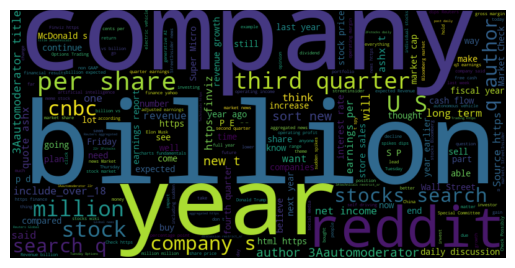

In [24]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task- 2 ->  Data Analysis

In [25]:
import re
import nltk
from nltk.corpus import stopwords

In [26]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Removing URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing non-alphabetic characters
    text = text.lower()  # here we are Converting the text to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Removing stop words
    return text

# cleaning the text column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [27]:
df.head()

,Title,Upvotes,Created,Text,Sentiment,YearMonth,Cleaned_Text
0,Online stock recommadtions premium acct,0,1970-01-01 00:00:01.733291661,"Hi guys, iam planning to purchase premium acct...",0.750000,1970-01,hi guys iam planning purchase premium acct get...
1,I Want to Hear Your Thoughts on the Qualities ...,0,1970-01-01 00:00:01.733291089,"With Pat Gelsinger retiring, the company is on...",0.011094,1970-01,pat gelsinger retiring company searching ceo s...
2,Name a large-cap stock and its small-cap compe...,46,1970-01-01 00:00:01.733271696,I am always looking for small/mid-cap companie...,0.222484,1970-01,always looking smallmidcap companies similar b...
3,Costco tariffs coming to a store near you!,0,1970-01-01 00:00:01.733271399,"I love Costco, the stores are awesome and they...",0.121975,1970-01,love costco stores awesome everything feel sto...
4,"""Existencial question"" about common stocks.",0,1970-01-01 00:00:01.733268558,Let's suppose that a few financial analysts ha...,0.039692,1970-01,lets suppose financial analysts evaluated intr...


In [28]:
from textblob import TextBlob

In [29]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [30]:
# here we are Applying sentiment polarity to the 'Cleaned_Text' column and adding one more column to df.
df['Sentiment_Polarity'] = df['Cleaned_Text'].apply(get_sentiment)

In [31]:
df.head()

,Title,Upvotes,Created,Text,Sentiment,YearMonth,Cleaned_Text,Sentiment_Polarity
0,Online stock recommadtions premium acct,0,1970-01-01 00:00:01.733291661,"Hi guys, iam planning to purchase premium acct...",0.750000,1970-01,hi guys iam planning purchase premium acct get...,0.750000
1,I Want to Hear Your Thoughts on the Qualities ...,0,1970-01-01 00:00:01.733291089,"With Pat Gelsinger retiring, the company is on...",0.011094,1970-01,pat gelsinger retiring company searching ceo s...,0.018669
2,Name a large-cap stock and its small-cap compe...,46,1970-01-01 00:00:01.733271696,I am always looking for small/mid-cap companie...,0.222484,1970-01,always looking smallmidcap companies similar b...,0.193912
3,Costco tariffs coming to a store near you!,0,1970-01-01 00:00:01.733271399,"I love Costco, the stores are awesome and they...",0.121975,1970-01,love costco stores awesome everything feel sto...,0.103333
4,"""Existencial question"" about common stocks.",0,1970-01-01 00:00:01.733268558,Let's suppose that a few financial analysts ha...,0.039692,1970-01,lets suppose financial analysts evaluated intr...,0.082701


In [32]:
## here we are adding one more column named sentiment_label to df based on sentiment_Polarity.
df['Sentiment-TB'] = df['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

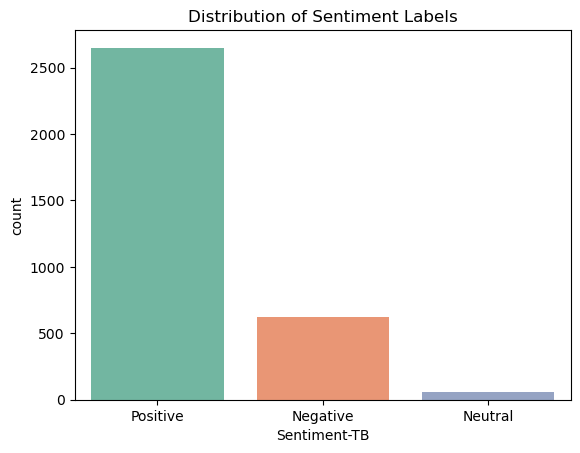

Sentiment-TB
Positive    2649
Negative     620
Neutral       55
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for Sentiment distribution
sns.countplot(data=df, x='Sentiment-TB', palette='Set2')
plt.title('Distribution of Sentiment Labels')
plt.show()

print(df['Sentiment-TB'].value_counts())

We can see that we have 2632 positive and 633 negative and 82 neutral.

In [34]:
df.head()

,Title,Upvotes,Created,Text,Sentiment,YearMonth,Cleaned_Text,Sentiment_Polarity,Sentiment-TB
0,Online stock recommadtions premium acct,0,1970-01-01 00:00:01.733291661,"Hi guys, iam planning to purchase premium acct...",0.750000,1970-01,hi guys iam planning purchase premium acct get...,0.750000,Positive
1,I Want to Hear Your Thoughts on the Qualities ...,0,1970-01-01 00:00:01.733291089,"With Pat Gelsinger retiring, the company is on...",0.011094,1970-01,pat gelsinger retiring company searching ceo s...,0.018669,Positive
2,Name a large-cap stock and its small-cap compe...,46,1970-01-01 00:00:01.733271696,I am always looking for small/mid-cap companie...,0.222484,1970-01,always looking smallmidcap companies similar b...,0.193912,Positive
3,Costco tariffs coming to a store near you!,0,1970-01-01 00:00:01.733271399,"I love Costco, the stores are awesome and they...",0.121975,1970-01,love costco stores awesome everything feel sto...,0.103333,Positive
4,"""Existencial question"" about common stocks.",0,1970-01-01 00:00:01.733268558,Let's suppose that a few financial analysts ha...,0.039692,1970-01,lets suppose financial analysts evaluated intr...,0.082701,Positive


In [35]:
# Create a binary target variable based on sentiment: 1 for positive sentiment, 0 for negative/neutral
df['Stock_Movement'] = df['Sentiment-TB'].apply(lambda x: 1 if x == 'Positive' else 0)

In [36]:
df.head()

,Title,Upvotes,Created,Text,Sentiment,YearMonth,Cleaned_Text,Sentiment_Polarity,Sentiment-TB,Stock_Movement
0,Online stock recommadtions premium acct,0,1970-01-01 00:00:01.733291661,"Hi guys, iam planning to purchase premium acct...",0.750000,1970-01,hi guys iam planning purchase premium acct get...,0.750000,Positive,1
1,I Want to Hear Your Thoughts on the Qualities ...,0,1970-01-01 00:00:01.733291089,"With Pat Gelsinger retiring, the company is on...",0.011094,1970-01,pat gelsinger retiring company searching ceo s...,0.018669,Positive,1
2,Name a large-cap stock and its small-cap compe...,46,1970-01-01 00:00:01.733271696,I am always looking for small/mid-cap companie...,0.222484,1970-01,always looking smallmidcap companies similar b...,0.193912,Positive,1
3,Costco tariffs coming to a store near you!,0,1970-01-01 00:00:01.733271399,"I love Costco, the stores are awesome and they...",0.121975,1970-01,love costco stores awesome everything feel sto...,0.103333,Positive,1
4,"""Existencial question"" about common stocks.",0,1970-01-01 00:00:01.733268558,Let's suppose that a few financial analysts ha...,0.039692,1970-01,lets suppose financial analysts evaluated intr...,0.082701,Positive,1


In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [38]:
sid = SentimentIntensityAnalyzer() # VADER sentiment analyzer

In [39]:
def assign_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [40]:
# Apply VADER sentiment analysis
df.loc[:, 'Sentiment-Vader'] = df['Text'].apply(lambda x: assign_sentiment(sid.polarity_scores(x)['compound']))

In [41]:
df['Sentiment-Vader'].value_counts()

Sentiment-Vader
Positive    2809
Negative     441
Neutral       74
Name: count, dtype: int64

<Axes: xlabel='Sentiment-Vader'>

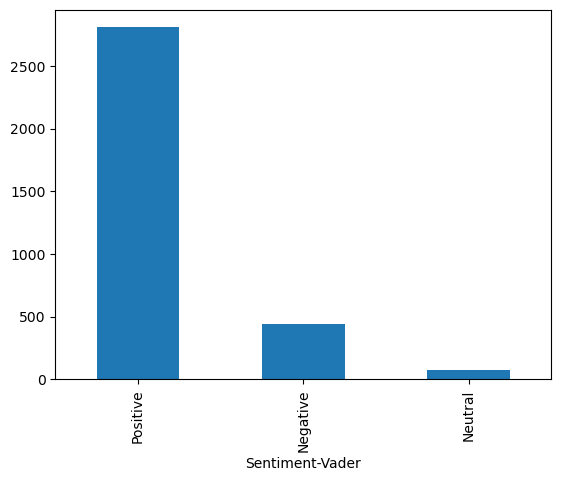

In [42]:
df['Sentiment-Vader'].value_counts().plot(kind='bar')

In [43]:
df['Upvotes']

0          0
1          0
2         46
3          0
4          0
        ... 
19797     76
19810     32
19825     94
19950    473
19968    284
Name: Upvotes, Length: 3324, dtype: int64

In [44]:
df['Upvotes'].mean()

258.1483152827918

In [45]:
df.groupby('Sentiment-Vader')

In [46]:
df.groupby('Sentiment-Vader')['Upvotes'].mean()

Sentiment-Vader
Negative    188.741497
Neutral     422.216216
Positive    264.722677
Name: Upvotes, dtype: float64

<Axes: xlabel='Sentiment-Vader'>

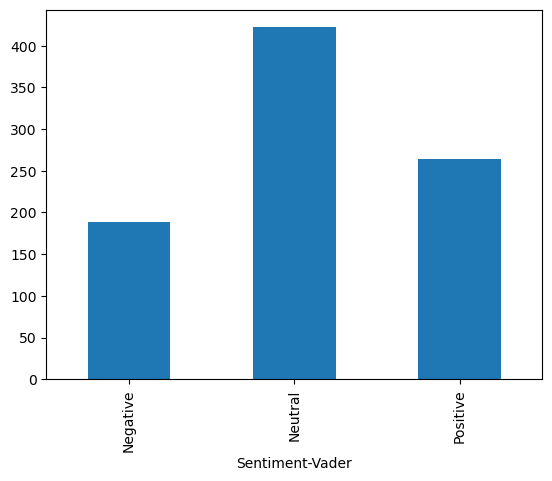

In [47]:
df.groupby('Sentiment-Vader')['Upvotes'].mean().plot(kind='bar')

In [48]:
df.head()

,Title,Upvotes,Created,Text,Sentiment,YearMonth,Cleaned_Text,Sentiment_Polarity,Sentiment-TB,Stock_Movement,Sentiment-Vader
0,Online stock recommadtions premium acct,0,1970-01-01 00:00:01.733291661,"Hi guys, iam planning to purchase premium acct...",0.750000,1970-01,hi guys iam planning purchase premium acct get...,0.750000,Positive,1,Positive
1,I Want to Hear Your Thoughts on the Qualities ...,0,1970-01-01 00:00:01.733291089,"With Pat Gelsinger retiring, the company is on...",0.011094,1970-01,pat gelsinger retiring company searching ceo s...,0.018669,Positive,1,Positive
2,Name a large-cap stock and its small-cap compe...,46,1970-01-01 00:00:01.733271696,I am always looking for small/mid-cap companie...,0.222484,1970-01,always looking smallmidcap companies similar b...,0.193912,Positive,1,Positive
3,Costco tariffs coming to a store near you!,0,1970-01-01 00:00:01.733271399,"I love Costco, the stores are awesome and they...",0.121975,1970-01,love costco stores awesome everything feel sto...,0.103333,Positive,1,Positive
4,"""Existencial question"" about common stocks.",0,1970-01-01 00:00:01.733268558,Let's suppose that a few financial analysts ha...,0.039692,1970-01,lets suppose financial analysts evaluated intr...,0.082701,Positive,1,Positive


In [49]:
## Now Compare the Predictions of both VADER and TextBlob

In [50]:
df['comparison'] = df['Sentiment-Vader'] == df['Sentiment-TB']

In [51]:
comparison_percentage = df['comparison'].mean() * 100

In [52]:
comparison_percentage

73.76654632972323

In [53]:
## we see that both the VADER and TextBlob performing well over the dataset.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [55]:
# Vectorize the text data means simply converting text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Cleaned_Text'])

In [56]:
# Perform LDA 
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components as needed
lda.fit(X)

terms = vectorizer.get_feature_names_out()

In [57]:
# By this we can Display the top words for each topic
for idx, topic in enumerate(lda.components_):  ## as we have 5 components.
    print(f"\nTopic #{idx + 1}:")
    top_words = [terms[i] for i in topic.argsort()[:-11:-1]]
    print(top_words)


Topic #1:
['stock', 'im', 'like', 'price', 'know', 'market', 'stocks', 'buy', 'dont', 'company']

Topic #2:
['billion', 'revenue', 'million', 'quarter', 'year', 'earnings', 'company', 'share', 'growth', 'sales']

Topic #3:
['im', 'money', 'visa', 'year', 'dividend', 'sell', 'apple', 'microsoft', 'know', 'yield']

Topic #4:
['news', 'stocks', 'fundamentals', 'investopedia', 'links', 'aggregated', 'market', 'google', 'options', 'question']

Topic #5:
['tesla', 'said', 'musk', 'trump', 'sofi', 'boeing', 'future', 'new', 'rivian', 'workers']


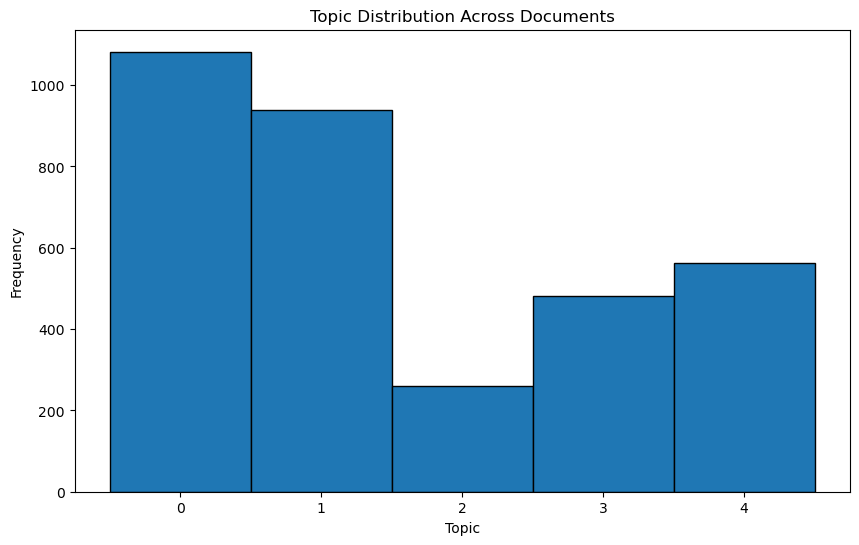

In [58]:
topic_weights = lda.transform(X)
df['Dominant_Topic'] = topic_weights.argmax(axis=1)  # adding one more column to df.

## plot it
plt.figure(figsize=(10,6))
plt.hist(df['Dominant_Topic'], bins=range(6), edgecolor='black', align='left')
plt.title('Topic Distribution Across Documents')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(range(5))
plt.show()

In [59]:
df.head()

,Title,Upvotes,Created,Text,Sentiment,YearMonth,Cleaned_Text,Sentiment_Polarity,Sentiment-TB,Stock_Movement,Sentiment-Vader,comparison,Dominant_Topic
0,Online stock recommadtions premium acct,0,1970-01-01 00:00:01.733291661,"Hi guys, iam planning to purchase premium acct...",0.750000,1970-01,hi guys iam planning purchase premium acct get...,0.750000,Positive,1,Positive,True,0
1,I Want to Hear Your Thoughts on the Qualities ...,0,1970-01-01 00:00:01.733291089,"With Pat Gelsinger retiring, the company is on...",0.011094,1970-01,pat gelsinger retiring company searching ceo s...,0.018669,Positive,1,Positive,True,1
2,Name a large-cap stock and its small-cap compe...,46,1970-01-01 00:00:01.733271696,I am always looking for small/mid-cap companie...,0.222484,1970-01,always looking smallmidcap companies similar b...,0.193912,Positive,1,Positive,True,0
3,Costco tariffs coming to a store near you!,0,1970-01-01 00:00:01.733271399,"I love Costco, the stores are awesome and they...",0.121975,1970-01,love costco stores awesome everything feel sto...,0.103333,Positive,1,Positive,True,0
4,"""Existencial question"" about common stocks.",0,1970-01-01 00:00:01.733268558,Let's suppose that a few financial analysts ha...,0.039692,1970-01,lets suppose financial analysts evaluated intr...,0.082701,Positive,1,Positive,True,0


In [60]:
df.columns

Index(['Title', 'Upvotes', 'Created', 'Text', 'Sentiment', 'YearMonth',
       'Cleaned_Text', 'Sentiment_Polarity', 'Sentiment-TB', 'Stock_Movement',
       'Sentiment-Vader', 'comparison', 'Dominant_Topic'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3324 entries, 0 to 19968
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               3324 non-null   object        
 1   Upvotes             3324 non-null   int64         
 2   Created             3324 non-null   datetime64[ns]
 3   Text                3324 non-null   object        
 4   Sentiment           3324 non-null   float64       
 5   YearMonth           3324 non-null   period[M]     
 6   Cleaned_Text        3324 non-null   object        
 7   Sentiment_Polarity  3324 non-null   float64       
 8   Sentiment-TB        3324 non-null   object        
 9   Stock_Movement      3324 non-null   int64         
 10  Sentiment-Vader     3324 non-null   object        
 11  comparison          3324 non-null   bool          
 12  Dominant_Topic      3324 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3),

## Task 3 -> Prediction

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [63]:
X = df[['Sentiment_Polarity']]  # We can use sentiment polarity as the feature
y = df['Stock_Movement']  # Target variable: 1 for upward movement, 0 for downward movement

In [64]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True)

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()     ## # Standardize the features as it is important for various models like Logistic Regression, SVM.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
## Logistic Regression with L2 Regularization
lr_model = LogisticRegression(penalty='l2', solver='liblinear')  # L2 regularization (Ridge)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.9975932611311673
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       354
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      1662
   macro avg       0.99      1.00      1.00      1662
weighted avg       1.00      1.00      1.00      1662

[[ 354    0]
 [   4 1304]]


In [100]:
# Logistic Regression with L1 regularization
lr_model_l1 = LogisticRegression(penalty='l1', solver='liblinear')  # L1 regularization (Lasso)
lr_model_l1.fit(X_train_scaled, y_train)
y_pred_lr_l1 = lr_model_l1.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_l1)}")
print(classification_report(y_test, y_pred_lr_l1))
print(confusion_matrix(y_test, y_pred_lr_l1))

Accuracy: 0.9975932611311673
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       354
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      1662
   macro avg       0.99      1.00      1.00      1662
weighted avg       1.00      1.00      1.00      1662

[[ 354    0]
 [   4 1304]]


In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

Accuracy: 0.9975932611311673
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       354
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      1662
   macro avg       0.99      1.00      1.00      1662
weighted avg       1.00      1.00      1.00      1662

[[ 354    0]
 [   4 1304]]


In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
## by Random Forest Classifier 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9975932611311673
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       354
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      1662
   macro avg       0.99      1.00      1.00      1662
weighted avg       1.00      1.00      1.00      1662

[[ 354    0]
 [   4 1304]]


In [105]:
from sklearn.svm import SVC

In [106]:
# by Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9975932611311673
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       354
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      1662
   macro avg       0.99      1.00      1.00      1662
weighted avg       1.00      1.00      1.00      1662

[[ 354    0]
 [   4 1304]]


In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
## By KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      1662
   macro avg       1.00      1.00      1.00      1662
weighted avg       1.00      1.00      1.00      1662

[[ 354    0]
 [   0 1308]]


In [94]:
## Finally i get i model which is performing extra ordinary over the entire test data.